In [1]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

In [3]:
#loading dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')


In [4]:
df.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [6]:
print(df.shape)

(100000, 9)


In [7]:
print(df.diabetes)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
db = df['diabetes'].unique()
print(db)

[0 1]


In [11]:
# replace the target values with meaningful names
df['diabetes'] = df['diabetes'].replace([0, 1], ['Positive', 'Negative'])
# Print the DataFrame
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,Positive
1,Female,54.0,0,0,No Info,27.32,6.6,80,Positive
2,Male,28.0,0,0,never,27.32,5.7,158,Positive
3,Female,36.0,0,0,current,23.45,5.0,155,Positive
4,Male,76.0,1,1,current,20.14,4.8,155,Positive
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,Positive
99996,Female,2.0,0,0,No Info,17.37,6.5,100,Positive
99997,Male,66.0,0,0,former,27.83,5.7,155,Positive
99998,Female,24.0,0,0,never,35.42,4.0,100,Positive


In [12]:
# Data cleaning
df = df.dropna()  # Drop any rows with missing values
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,Positive
1,Female,54.0,0,0,No Info,27.32,6.6,80,Positive
2,Male,28.0,0,0,never,27.32,5.7,158,Positive
3,Female,36.0,0,0,current,23.45,5.0,155,Positive
4,Male,76.0,1,1,current,20.14,4.8,155,Positive
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,Positive
99996,Female,2.0,0,0,No Info,17.37,6.5,100,Positive
99997,Male,66.0,0,0,former,27.83,5.7,155,Positive
99998,Female,24.0,0,0,never,35.42,4.0,100,Positive


In [13]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000


In [14]:
# let's check number of samples for each class 
df.groupby('diabetes').size()

diabetes
Negative     8500
Positive    91500
dtype: int64

<Figure size 1000x600 with 0 Axes>

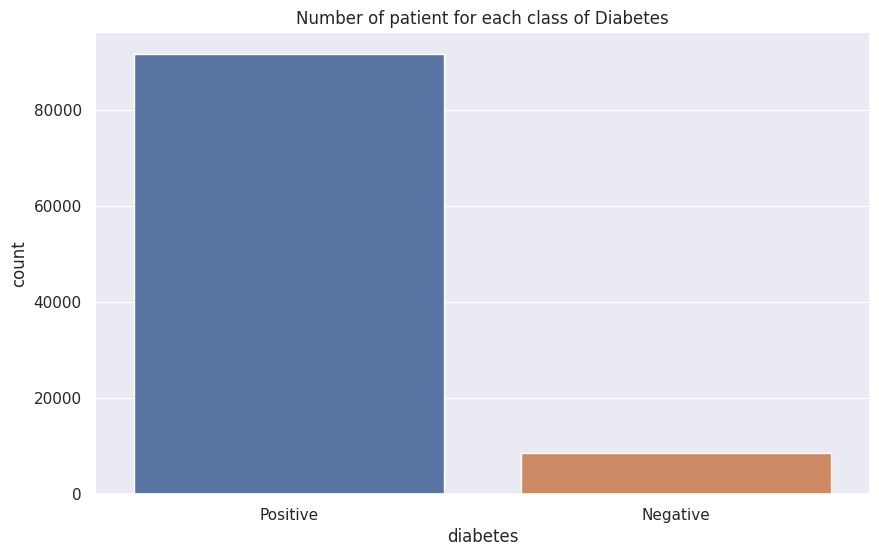

In [15]:
sns.set(rc={'figure.figsize':(10,6)}) # set width and height of the plot
plt.figure(figsize=(10,6)) # adjust the size of the plot

plt.show() # show the plot
# let's visualise the number of samples for each class with count plot
sns.countplot(x='diabetes', data=df)
plt.title("Number of patient for each class of Diabetes");

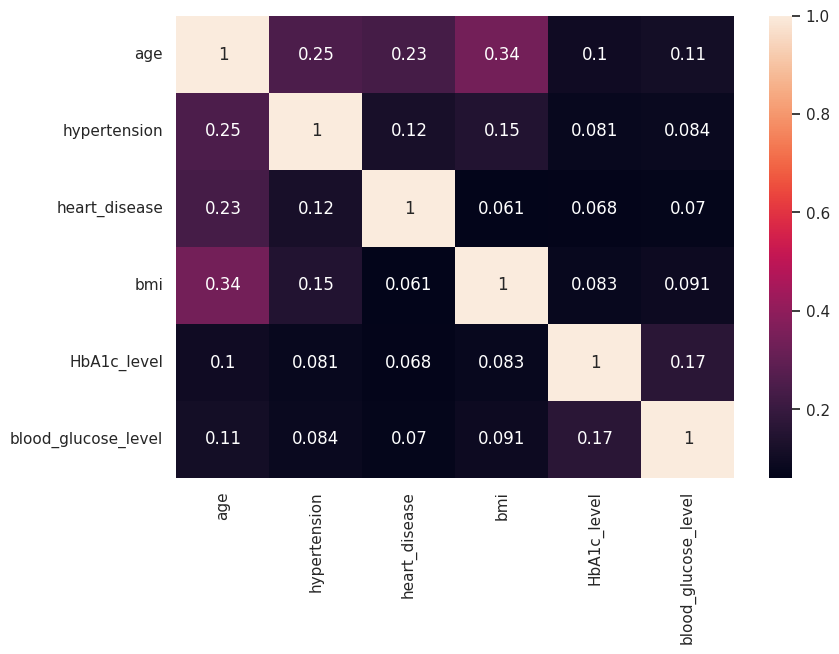

In [16]:
# select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# compute correlation matrix on numeric columns only
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

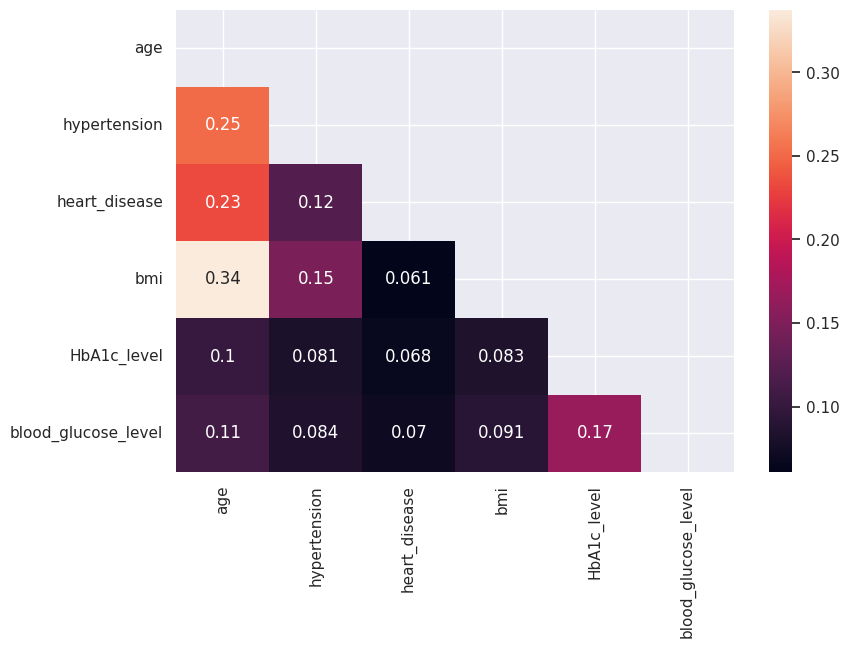

In [17]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

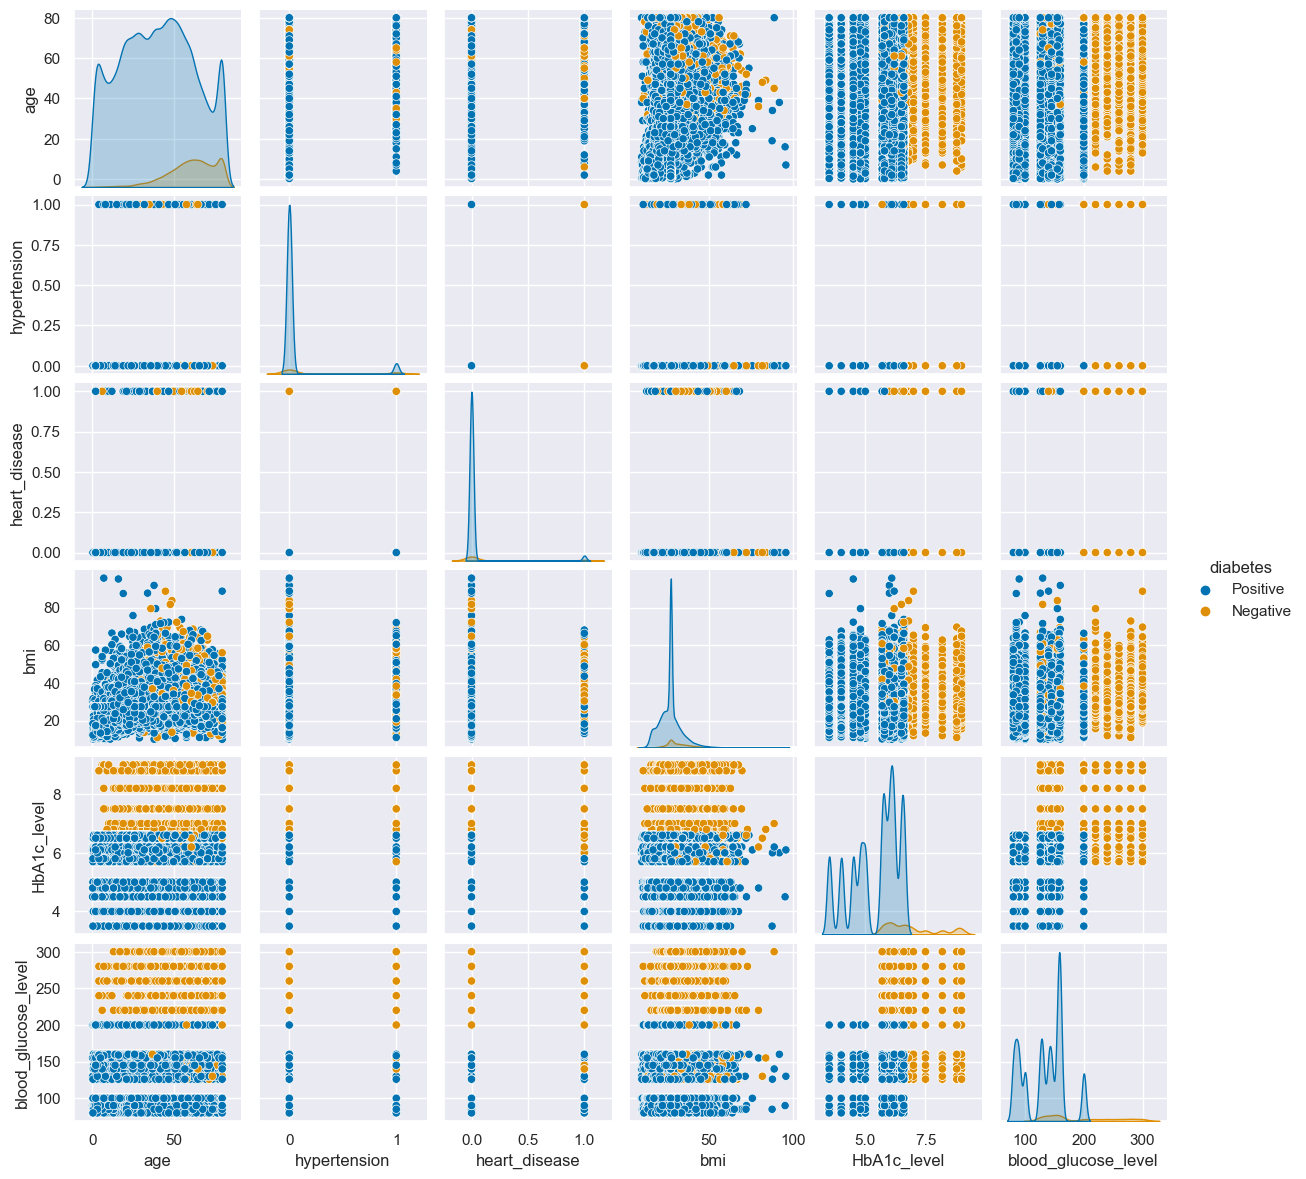

In [ ]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(df, hue="diabetes", height = 2, palette = 'colorblind');

In [18]:
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,Positive
1,Female,54.0,0,0,No Info,27.32,6.6,80,Positive
2,Male,28.0,0,0,never,27.32,5.7,158,Positive
3,Female,36.0,0,0,current,23.45,5.0,155,Positive
4,Male,76.0,1,1,current,20.14,4.8,155,Positive
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,Positive
99996,Female,2.0,0,0,No Info,17.37,6.5,100,Positive
99997,Male,66.0,0,0,former,27.83,5.7,155,Positive
99998,Female,24.0,0,0,never,35.42,4.0,100,Positive


In [21]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['gender', 'smoking_history']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to the specified columns
df[cols_to_encode] = df[cols_to_encode].apply(le.fit_transform)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,Positive
1,0,54.0,0,0,0,27.32,6.6,80,Positive
2,1,28.0,0,0,4,27.32,5.7,158,Positive
3,0,36.0,0,0,1,23.45,5.0,155,Positive
4,1,76.0,1,1,1,20.14,4.8,155,Positive
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,Positive
99996,0,2.0,0,0,0,17.37,6.5,100,Positive
99997,1,66.0,0,0,3,27.83,5.7,155,Positive
99998,0,24.0,0,0,4,35.42,4.0,100,Positive


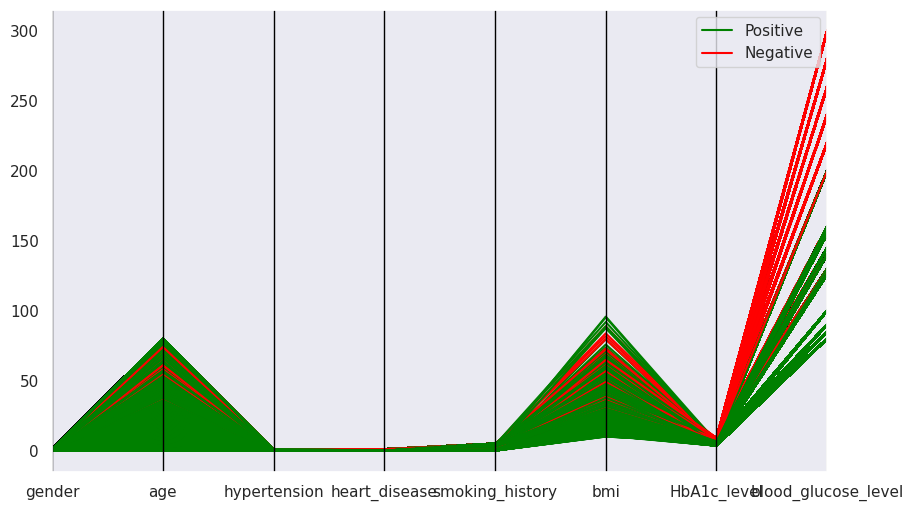

In [23]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df,"diabetes", color = ['green', 'red']);

In [24]:
# feature matrix
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
                 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[feature_names]
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [26]:
#target variable
y=df['diabetes']
y

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
99995    Positive
99996    Positive
99997    Positive
99998    Positive
99999    Positive
Name: diabetes, Length: 100000, dtype: object

In [27]:
#train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (80000, 8)
X_test shape:  (20000, 8)
y_train shape:  (80000,)
y_test shape:  (20000,)


In [33]:
#importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9624
----------------------------------


In [34]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.9519
---------------------------------


In [35]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9588
----------------------------------


In [36]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.9587
---------------------------------


In [37]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.9048
---------------------------------


Accuracy scores:
NB: 0.9048
KNN: 0.9588
SVM: 0.9624
DT: 0.9519
LR: 0.9587


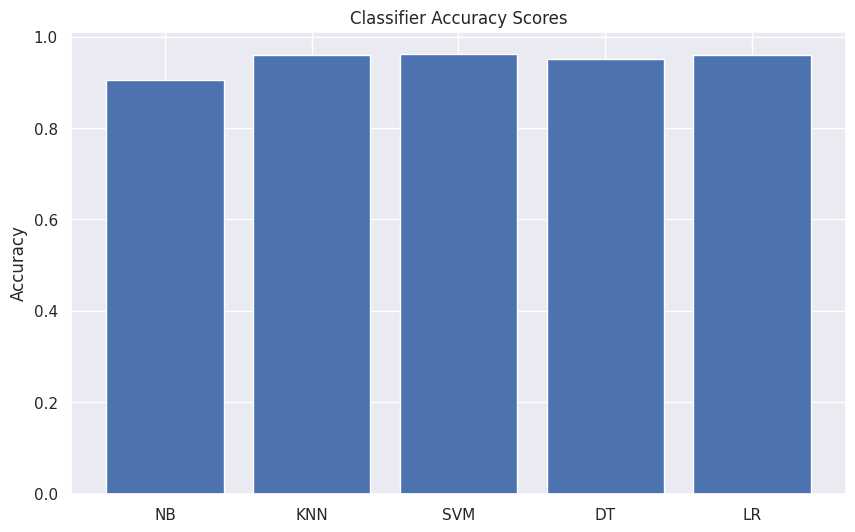

In [42]:
# print the accuracy scores
print('Accuracy scores:')
for s in score:
    print('{}: {}'.format(s[0], s[1]))

# plot the accuracy scores
fig, ax = plt.subplots()
ax.bar([s[0] for s in score], [s[1] for s in score])
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Accuracy Scores')
plt.show()


In [43]:
# select the best classifier
best_classifier = max(score, key=lambda x: x[1])[0]
print('The best classifier is:', best_classifier)

The best classifier is: SVM
